# Chapter 8. Dimensionality Reduction

Many ML problems will involve thousands or even millions of features per instance. Not only all of these features make training extremly slow, but they can also make it much harder for an optimization method to find a good solution.

This problem is often referred to as the **curse of dimensionality**. In real world problem, it is often possible to reduce the number of features considerably. This results in turning an intractable problem into a tractable one.

The goal is to remove the maximum number of features while minimizing information loss that relates to a specific task (example: Classifying MNIST digits). However, dimensionality reduction will always cause some information loss. It will also make our pipeline a bit more complex and thus harder to maintain.

Dimensionality reduction is usually conducted to **speed up training** and is extremly useful for data visualization by projecting the data to a 2-3 dimensional space for visualization.

DataViz is also important to communicate your findings to people who are not data scientists. In Particular, to decision makers who will use the results.

In this chapter we will:
- Discuss the curse of dimenstionality.
- Get a sense of what goes on in a high-dimenstional space.
- Consider the main two approaches to dimensionality reduction:
    - Projection
    - Manifold Learning
- Go through 3 popular dimensionality reduction techniques:
    - PCA
    - Kernel PCA
    - LLE

## The Curse of Dimensionality

We are so used to living in three dimensions, 4 if we consider time, and a few more if we are string theorists. It turns out that many things behave very differently in high-dimensional spaces.

If we pick a random point in a unit square, it will have ~0.4% chance of being located at <0.001 from a border. But in a 1,000-dimensional hyper-cube the probability is >99.999999%. Most points in a high-dimensional space are very close to the border. Same goes to distances betweeen points, If you pick two random points in a lower dimensional space, they will be closer in comparison to picking them from a high-dimensional space.

**There is just plenty of space in a high-dimensional one!**. This means that high-dimensional datasets are at risk of being too sparse.

The more dimensions a dataset has, the more risk it is to overfit it.

## Main Approaches to Dimensionality Reduction

### Projection

In most real-world problems, training instances are not spread out uniformly across the dimensions. Many features are almost constant, while others are highly correlated. As a result, all training instances acutally sit on a much-lower dimensional **subspace** of the high-dimensional space.

Here is an example of that:

<div style="text-align:center;">
    <img style="width:50%" src="../static/imgs/subspace_projection.png" />
</div>

If we perpenducarly project every training instance into the subspace, we get a new 2D dataset represented as follows:

<div style="text-align:center;">
    <img style="width:50%" src="../static/imgs/2d_projection.png" />
</div>

However, projection is not always to best approach to dimensionality reduction. In many case the subspace may twist & turn.

### Manifold Learning

A 2D manifold is a 2D shape that can be bent & twisted in a higher-dimensional space. More generally, a d-dimensional manifold is part of an n-dimensional space (where $d < n$), that locally resembles a d-dimensional hyperplace.

Many dimensionality reduction algorithms work by modeling the manifold on which the training instances lie, this is called **Manifold Learning**. It relies on the *manifold assumption*, also called the *manifold hypothesis* which states that most real world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often empirically observed.

If we were to generate all possible random images on a `28x28` grid, only a small fraction of them would look like handwritten digits. In other words, the degrees of freedom available to us if we were to create a digit image are very low compared to the degree of freedom we have when we want to create any image we want. These constraints tend to squeeze the dataset into a lower-dimensional manifold.

An implicit additional assumption is that the task at hand (being regression or classification) would be much easier if conducted on the lower dimensional manifold space. However, this assumption does not always hold.

Examples to follow:

<div style="text-align:center;">
    <img style="width:50%" src="../static/imgs/manifold_classification.png" />
</div>

In short, reducing the dimensionality of our dataset will speed up training, but it doesn't guarantee a simpler solution. It all depends on the dataset and the task at hand.

Now we will go through some of the most popular dimensionality reduction algorithms.

## PCA

Principal Component Analysis is by far the most popular dimensionality reduction algorithm.

First, it identifies the hyperplane that lies closest to the data. Then, it projects the data into it.

### Preserving the Variance

We want to choose a hyperplace that most preserves the variance within the data, the following are attempted projections for 3 chosen hyperplanes (1D axis):

<div style="text-align:center;">
    <img style="width:66%" src="../static/imgs/2D_variance_projection.png" />
</div>

It seems reasonable to select the axis that preserves the maximum amount of variance. As it will most likely lose less information than other projections.

Another way of looking at it is by choosing the solid line axis, we are minimizing the mean squared distance between the original points and their projections into the chosen axis. This is the rather simple idea behind PCA.

### Principle Components

PCA identifies the axis that accounts for the largest amount of variance in the training set. It also finds a second axis, orthogonal to the first one, that accounts for the largest amount of remaining variance.

If we're considering a higher-dimensional dataset, PCA would also find a third axis, and a fourth, and a fifth, and so on... (As many axes as the number of dimensions in the dataset).

The `i`th axis is called the `i`th **principal component** of the data.

So, how can we find the principal components of a training set? There is a standard matrix vectorization technique called *Singular Value Decomposition (SVD)*. It can decompose the training set $X$ into $X=U \Sigma V^T$, $V$ contains the unit vectors that define all the principal components that we are looking for:
    
$$V=
  \begin{pmatrix}
    \vert & \vert & \dots & \vert \\
    c_1 & c_2 & \dots & c_n \\
    \vert & \vert & \dots & \vert \\
  \end{pmatrix}
$$

Let's extract the principal components of a dataset using numpy's `svd` implementation:

Let's start by generating some data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
X = np.linspace(start=-1., stop=1., num=100)
y = X + np.random.normal(size=100)/7.
X.shape, y.shape

((100,), (100,))

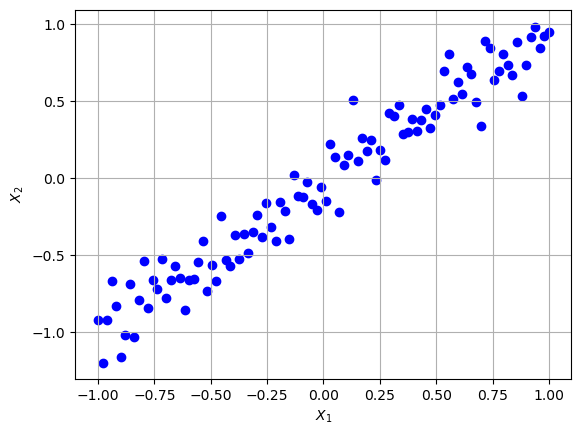

In [3]:
plt.scatter(X, y, c='blue')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid()
plt.show()

In [4]:
X = np.concatenate((X[..., None], y[..., None]), axis=1)
X.shape

(100, 2)

In [6]:
X

array([[-1.        , -0.91859439],
       [-0.97979798, -1.19608337],
       [-0.95959596, -0.91752399],
       [-0.93939394, -0.66353447],
       [-0.91919192, -0.83208035],
       [-0.8989899 , -1.15956234],
       [-0.87878788, -1.01500736],
       [-0.85858586, -0.68648882],
       [-0.83838384, -1.02962749],
       [-0.81818182, -0.78991515],
       [-0.7979798 , -0.53897615],
       [-0.77777778, -0.84374304],
       [-0.75757576, -0.6579382 ],
       [-0.73737374, -0.71862492],
       [-0.71717172, -0.52496887],
       [-0.6969697 , -0.77678853],
       [-0.67676768, -0.65836896],
       [-0.65656566, -0.57135828],
       [-0.63636364, -0.64850239],
       [-0.61616162, -0.85478193],
       [-0.5959596 , -0.657095  ],
       [-0.57575758, -0.65363137],
       [-0.55555556, -0.54161567],
       [-0.53535354, -0.40600862],
       [-0.51515152, -0.73052733],
       [-0.49494949, -0.56280037],
       [-0.47474747, -0.66672256],
       [-0.45454545, -0.24216001],
       [-0.43434343,

In [7]:
X_centered = X - X.mean(axis=0)

In [8]:
U, s, Vt = np.linalg.svd(a=X_centered)

In [9]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [10]:
c1, c2

(array([0.70555903, 0.70865115]), array([-0.70865115,  0.70555903]))

These two 2D points represent the unit vector points (origin at (0,0)) corresponding to the 2 principal components (axes that preserve variance). PCA assumes that the dataset is centered around the origin, but `scikit-learn` implementation takes care of centering the data for you.

### Projecting down to $d$ Dimensions

Once we have identified all the principal components, we can reduce the dimensionality of the dataset down to $d$ dimensions by projecting it onto the hyperplane defined by the first $d$ principal components.

Selecting this hyperplane ensures that the projection will preserve as much variance as possible.

To Project the training set into the hyperplane and obtain a reduced dataset $X_{d-proj}$ of dimensionality $d$, we compute the matrix multiplication of the training set matrix $X$ by the matrix $W_{d}$. $W_{d}$ is the matrix containing the first $d$ columns of $V$ representing the principal components.

$$X_{d-proj}=XW_d$$

Let's do it in Python:

In [11]:
W2 = Vt.T[:, :2]

In [12]:
X2D = X_centered.dot(W2)
X2D.shape

(100, 2)

### Using Scikit-Learn

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)

In [19]:
X2D = pca.fit_transform(X)

In [20]:
assert np.all(np.abs(pca.components_) == np.abs(W2)) # test must be near closed together.

AssertionError: 

### Explained Variance Ratio

The ratio indicates the proportion of the dataset's variance lying along each principal component.

Let's take a look at it for our scikit-learn learner:

In [21]:
pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)

(array([0.98619936, 0.01380064]), 1.0)

### Choosing the Right Number of Dimensions

We should choose the number of dimensions that add up to a large portion of the variance that lied within the original dataset (Example: $>=95\%$), unless we are reducing dimensionality to visualize the data. In that case you will want to reduce the data down to 2/3 axis.

Let's do it in scikit-learn:

In [22]:
pca = PCA()

In [23]:
pca.fit(X)

PCA()

In [27]:
cumsum = np.cumsum(pca.explained_variance_ratio_) # Return the cumulative sum of the elements along a given axis

In [29]:
d = np.argmax(cumsum >= .95) + 1 # Returns the indices of the maximum values along an axis.

In [30]:
d

1

Then we re-run PCA training using $d$, However, there is a much better option, that of specifying a float for `n_components` as the ratio of variance we want to preserve.

In [31]:
pca = PCA(n_components=0.95)

In [32]:
X_reduced = pca.fit_transform(X)

### `PCA` for Compression 

After dimensionality reduction, the training set takes much less space.

It is also possible to decompress the reduced dataset back to $784$ (in the case of MNIST) by applying **the inverse transformation of the PCA projection**. This won't give us back the original data since 5% of the variance was lost while compressing, but it will likely be close to the original dataset.

The mean squared distance between the original dataset and the decompressed dataset is called the Reconstruction Error.

Let's do it with scikit-learn:

In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [34]:
X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)

C:\Users\abdo\.conda\envs\tf2\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [35]:
# get Dataset from local saving:
import pickle 

In [36]:
# save sklear model:
def sklearnModelSave(model, filename):
    pickle.dump(model, open('datasets/' + filename, 'wb'))
# used:
# sklearnModelSave(mnist, 'mnist_784.dataSet')

In [39]:
def loadSklearnModel(filename):
    return pickle.load(open('../../datasets/' + filename, 'rb'))
# used:
#dataModel = loadSklearnModel('mnist_784.dataSet')
#dataModel

In [40]:
dataModel = loadSklearnModel('mnist_784.dataSet')
dataModel

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [42]:
X = dataModel["data"]
y = dataModel["target"].astype(np.uint8)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46900, 784), (23100, 784), (46900,), (23100,))

In [45]:
pca = PCA(n_components=154)

In [46]:
X_reduced = pca.fit_transform(X_train)

In [47]:
X_recovered = pca.inverse_transform(X_reduced)

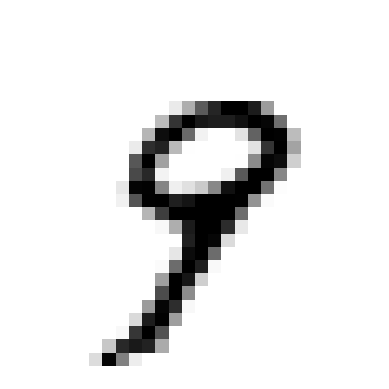

In [48]:
plt.imshow(X_train[0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

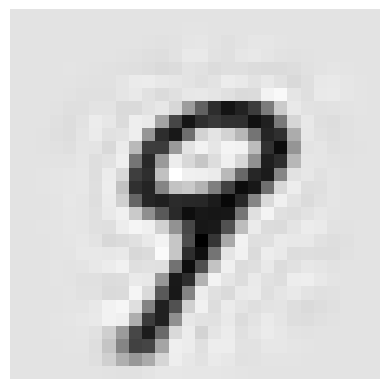

In [49]:
plt.imshow(X_recovered[0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

Following is the equation of the inverse transformation:

$$X_{recovered}=X_{d-proj}W_{d}^{T}$$

### Randomized PCA

We can use a stochastic algorithm called *Randomized PCA* that quickly finds an approximation of the first $d$ principal components. Its computational complexity is $O(m \times d^{2})+O(d^3)$ instead of SVD's $O(m \times n^{2})+O(n^3)$. So it's dramatically faster then SVD when $d << n$.

Let's use it with `scikit-learn`:

In [50]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')

In [51]:
X_reduced = rnd_pca.fit_transform(X_train)

### Incremental PCA

One problem with the previous implementations of PCA is that they require the whole training data to fit in memory. Fortunately, **incremental PCA** algorithms have been developed. They allow us to split the training set in mini-batches and feed them one at a time to the IPCA algorithm. This is useful when having large training sets or doing online learning.

Let's experiment with incremental PCA using scikit-learn:

In [52]:
from sklearn.decomposition import IncrementalPCA

In [53]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

In [54]:
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

In [55]:
X_reduced = inc_pca.transform(X_train)

We can also mimic normal fitting behavior by using the `memap` class to store our training data:

## Kernel PCA

We should recall that a linear decision boundary in a high-dimensional space corresponds to a non-linear decision boundary in the original low-dimensional space. It turns out that the "kernel trick" can also be applied to PCA, making it possible to perform complex non-linear projections for dimensionality reduction. It's often **good at preserving clusters of instances after projecting them**.

Let's use kPCA in scikit-learn:

First we create a swiss roll:

In [73]:
X, _ = datasets.make_swiss_roll(n_samples=1000, noise=1)

In [74]:
from sklearn.decomposition import KernelPCA

In [75]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04, n_jobs=-1)

In [76]:
X_reduced = rbf_pca.fit_transform(X)

In [77]:
X_reduced.shape

(1000, 2)

### Selecting a Kernel and Tuning Hyperparameters

As kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help us select the best kernel and hyper-parameter values. That said, dimensionality reduction is often a pre-processing step for a supervised learning task. So we can use grid search to select the kernel and hyper-parameters that lead to the best performance on the end task.

The following scikit-learn example create a two step pipeline:
1. Reduce the dimensionality to 2 dimensions using kPCA.
2. Apply logistic regression for classification.

Then we use `GridSearchCV` to find the best **kernel** and **gamma** value for kPCA in order to get the best classification accuracy at the end of the pipeline.

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [79]:
clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

In [80]:
param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 5),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

In [81]:
grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1)

In [82]:
grid_search.fit(X_train[:10000], y_train[:10000])  # not enough compute for all training all

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'kpca__gamma': array([0.03 , 0.035, 0.04 , 0.045, 0.05 ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [83]:
grid_search.best_params_

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}

Another approach, entirely unsupervised, is to select the kernel and hyper-parameters that **yield the lowest reconstruction error**.

Let's visualize the steps we take with kernel-based dimensionality reduction:

<div style="text-align:center;">
    <img style="width:50%" src="../static/imgs/reconstruction_vis.png" />
</div>

Notice that when we invert our final transformation, we get instance on the infinite feature space and not the original space. Since the feature space is infinite, we cannot compute the reconstruction loss, but it's possible to find a point in the original space that map close to the reconstructed point, this point is called the reconstructed **pre-image**.

Once we have the pre-image, we can measure its squared distance to the original instance. In terms of **how to perform the reconstruction**, we can train a supervised learning algorithm to find a mapping between the original dataset and the reduced data.

`scikit-learn` can do it for us with the `fit_inverse_transform` hyper-parameter:

In [84]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)

In [85]:
X_reduced = rbf_pca.fit_transform(X)

In [86]:
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
mean_squared_error(X, X_preimage)

29.344826474287427

We can grid search to find the hyper-parameters that minimize this error.

To use grid search to find the hyperparameters that minimize the reconstruction error using KernelPCA, we can use the GridSearchCV module from scikit-learn.

In [89]:
# Import required libraries
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.datasets import make_swiss_roll

# Generate a synthetic dataset (Swiss Roll example)
#X, _ = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

# Define a function to calculate reconstruction error
def reconstruction_error(kernel, gamma, n_components):
    kpca = KernelPCA(
        n_components=n_components, kernel=kernel, gamma=gamma, fit_inverse_transform=True
    )
    X_reduced = kpca.fit_transform(X)
    X_preimage = kpca.inverse_transform(X_reduced)
    return mean_squared_error(X, X_preimage)

# Set up the parameter grid for GridSearchCV
param_grid = {
    "kernel": ["rbf", "sigmoid"],
    "gamma": np.linspace(0.01, 0.1, 10),
    "n_components": [2, 3, 5],
}

# Define a custom scorer for GridSearchCV
def scorer(params):
    return -reconstruction_error(params["kernel"], params["gamma"], params["n_components"])

# Perform grid search
best_params = None
best_score = float("inf")
for kernel in param_grid["kernel"]:
    for gamma in param_grid["gamma"]:
        for n_components in param_grid["n_components"]:
            score = reconstruction_error(kernel, gamma, n_components)
            if score < best_score:
                best_score = score
                best_params = {"kernel": kernel, "gamma": gamma, "n_components": n_components}

# Output the best hyperparameters and corresponding error
print("Best Hyperparameters:", best_params)
print("Minimum Reconstruction Error:", best_score)

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 0.01, 'n_components': 5}
Minimum Reconstruction Error: 8.82143298245507


## LLE

Locally Linear Embedding is a powerful non-linear dimensionality reduction technique. It's a manifold learning technique that doesn't rely on projections like the previous algorithms do. LLE works by first measuring how each instance relates to its neighbors. Then it looks for low-dimensional representation of the training set where each local relationship is best preserved.

Let's use it with scikit-learn:

In [90]:
from sklearn.manifold import LocallyLinearEmbedding

In [91]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

In [92]:
X_reduced = lle.fit_transform(X)

The resulting 2D dataset is shown as follows:

<div style="text-align:center;">
    <img style="width:50%" src="../static/imgs/swiss_unroll.png" />
</div>

LLE did a pretty good job at modeling the manifold. Here is how LLE works:
1. For each training instance $x^{(i)}$, the algorithm identifies its $k$ closest neighbors.
2. The Algorithm tries to reconstruct $x^{(i)}$ as a linear function of these neighbors.
3. It finds $w_{i,j}$ such that it minimizes $J(x^{(i)}, \sum_{j=1}^{m}w_{i,j}x^{(j)})$.

We can formalize the problem as follows:

$$\hat{W}=argmin_{W}\sum_{i=1}^{m}(x^{(i)} - \sum_{j=1}^{m}w_{i,j}x^{(j)}))^2$$

Such that the sum of each instance weights is $1$. After this step, **$\hat{W}$ encodes the local linear relationships between the training instances**. The second step is to map the training instances into a d-dimensional space (where $d<n$) **while preserving these local relationships as much as possible**.

If $z^{(i)}$ is the image of $x^{(i)}$ in this d-dimensional space, then we want to minimize $J(z^{(i)}, \sum_{j=1}^{m}\hat{w}_{i,j}z^{(j)})$.

This leads to the following unconstrained optimization problem:

$$\hat{Z}=argmin_{Z}\sum_{i=1}^{m}(z^{(i)} - \sum_{j=1}^{m}\hat{w}_{i,j}z^{(j)}))^2$$

`Scikit-learn` LLE implementation has the following computational complexity:
- $O(m log(m) n log(k))$ for finding the k nearest neighbors.
- $O(mnk^3)$ for optimizing the weights.
- $O(dm^2)$ for constructing the low-dimensional representations. The $m^2$ makes the algorithm scales very poorly to large datasets.

## Other Dimensionality Reduction Techniques

Here are some of the most popular ones:
- [Random projections](https://scikit-learn.org/stable/modules/random_projection.html).
- Multidimensional scaling.
- IsoMap
- t-Distributed Stochastic Neighbor Embedding (t-SNE)
- Linear Discriminant Analysis (LDA)

# Exercices

**1. What are the main motivations for reducing a Dataset's dimensionality? What are the main Drawbacks?**

We list the following motivations: 
- We can visualize the data in 2D/3D spaces. 
- We want to reduce the dimensionality of big datasets that we suspect have static or very noisy features, so reduction will be a preprocessing step to then train the reduced dataset for the final task, meaning faster training.
- Data compression.

Drawbacks: by reducing the dimensionality of the dataset .. 
- We typically lose some useful information in the process even though we try to preserve as much as possible.
- the resulting trained classifier will typically be weaker than a classifier trained on the original dataset.
- It can be computationally expensive (depending on the algorithm, the features and the size of the dataset).
- It adds complexity to the overall machine learning pipeline.
- Transformed features are often hard to interpret.

**2. What is the curse of dimensionality?**

As we increase the number of dimensions (or features) the average distance between any two instances tend to increase as well, in other words, in high-dimensional spaces, instances tend to sit on the edges of the space. This leads to training problems since no clusters/trends are apparent in a space filled with void and the algorithm would need more data to learn. 

**3. Once a Dataset's dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?**

It depends on the algorithm used to reduce the dimensionality of the data, in the case of PCA, we can recover most of the information using the following formula:

$$X_{\text{recovered}}=X_{\text{d-proj}}W_{d}^{T}$$

For manifold learning, if using the kernels for example, we can't really reverse the operation since we first project into an infinite-dimensional space. But we can approximate a reverse operation by distance.

**4. Can PCA be used to reduce the dimensionality of a highly non-linear dataset?**

Generally speaking, when we have a dataset with many useless features, reducing it is possible while preserving information, but if the features of the data are important, as in the case of the data sitting in a manifold, compressing it with PCA would lose too much information.

**5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?**

We can't really know without optimizing for retaining 95% variance within the data.

If all of the variance occur on one dimension, then the resulting will have a dimensionality of 1. Else, it will necessarily increase the number of dimensions.

**6. In What cases would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?**

We use Vanilla PCA for static data analysis where we want to perform a one-time dimensionality reduction for the purposes of data analysis.

We use incremental PCA when we have a large dataset that can't be fit into memory at once. We also use it when we're in an online setup and instances/batches are coming in intervals.

We use Randomized PCA when speed and performance are important, for its faster search algorithm.

We use Kernel PCA if we know that the high-dimensional instances form clusters and we want to preserve that after projection. 

**7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?**

By measuring the reconstruction loss, meaning the distance betweeen the original dataset and the compressed then reconstructed dataset using a particular algorithm. When the trained algorithms don't offer a reconstruction mechanism, we can simply evaluate their performance by comparing the end metric while freezing the subsequent steps in the pipeline, for example if we're doing dimensionality reduction then classification, we would fix the algorithm/hyperparameters of the ML step and vary the dimensionality reduction algorithm and take the classification accuracy as a metric to evaluate different dimensionality reduction algorithms.

**8. Does it make any sense to chain two different dimensionality reduction algorithms?**

It may make sense if algorithm A is good for high to low dim reduction then another algorithm is good for low-dim to d-dim cluster-preserving reduction. Or Algorithm B is better then A but much slower, so we use A to get rid of most useless features then B to maximize performance.

**9. Load the MNIST dataset & split it into train/test sets**

In [93]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [95]:
#X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)
dataModel = loadSklearnModel('mnist_784.dataSet')
X = dataModel["data"]
y = dataModel["target"].astype(np.uint8)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)

**Train a random forest classifier on the dataset and time how long it takes**

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
forest = RandomForestClassifier(n_estimators=100)

In [99]:
%timeit -n1 -r1 forest.fit(X_train, y_train)

44.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Then evaluate the resulting model on the test set**

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(y_test, forest.predict(X_test))

0.9707

**Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%**

In [102]:
from sklearn.decomposition import PCA

In [103]:
pca = PCA(n_components=0.95)

In [104]:
pca.fit(X_train)

PCA(n_components=0.95)

In [105]:
X_train_ = pca.transform(X_train)
X_test_ = pca.transform(X_test)

**Train a random forest classifier on the reduced dataset and see how long it takes. Was training much faster?**

In [106]:
forest = RandomForestClassifier(n_estimators=100)

In [107]:
%timeit -n1 -r1 forest.fit(X_train_, y_train)

3min 10s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


It was about x2.25 **slower** (Prob for not having the time to run multiple performance loops).

**Next, evaluate the classifier on the test set. How does it compare to the previous classifier?**

In [108]:
accuracy_score(y_test, forest.predict(X_test_))  # expected.

0.9517

**10. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using `matplotlib`**

In [109]:
from sklearn.manifold import TSNE

In [110]:
tsne = TSNE()

In [111]:
X_train_ = tsne.fit_transform(X_train[:1000])

C:\Users\abdo\.conda\envs\tf2\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\abdo\.conda\envs\tf2\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\abdo\.conda\envs\tf2\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\abdo\.conda\envs\tf2\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\abdo\.conda\envs\tf2\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [112]:
import matplotlib.pyplot as plt

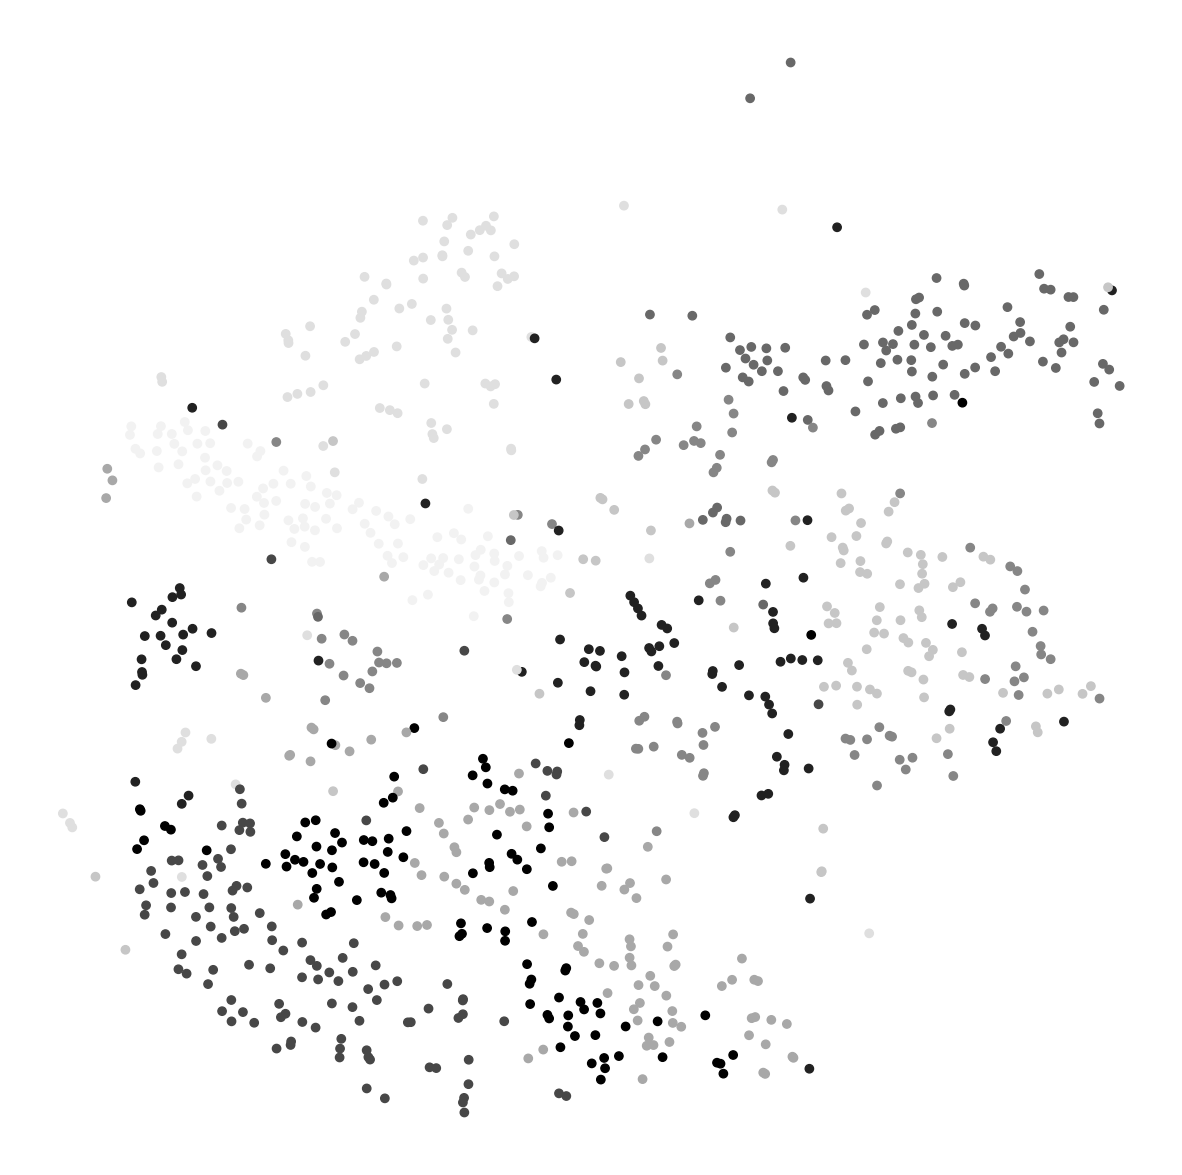

In [113]:
plt.figure(figsize=(15, 15))
plt.scatter(X_train_[:, 0], X_train_[:, 1], c=y_train[:1000].astype(int), cmap='Greys')
plt.axis('off')
plt.show()

**You can replace each dot with its corresponding instance class** (from 0 to 9)

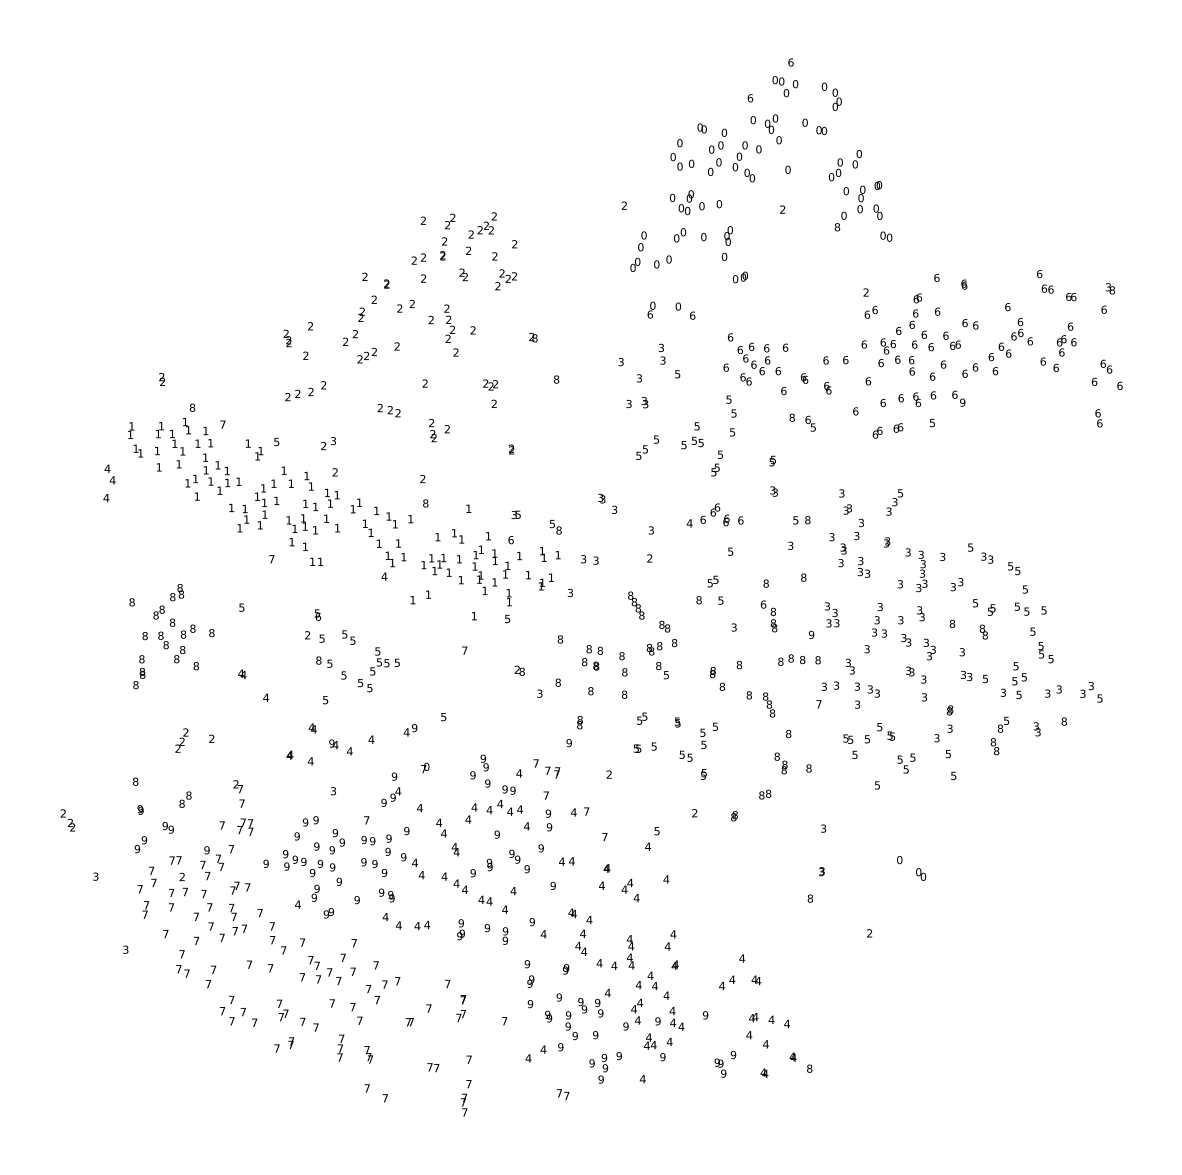

In [114]:
plt.figure(figsize=(15, 15))
labels = y_train[:1000].astype(int)
for idx in range(len(X_train_)):
    plt.scatter(X_train_[idx,0], X_train_[idx,1], marker=f"$ {labels[idx]} $", c='black', edgecolors='none')
plt.axis('off')
plt.show()

**Even plot scaled-down versions of the digit images themselves** (make sure to only visualize a sample)

In [115]:
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

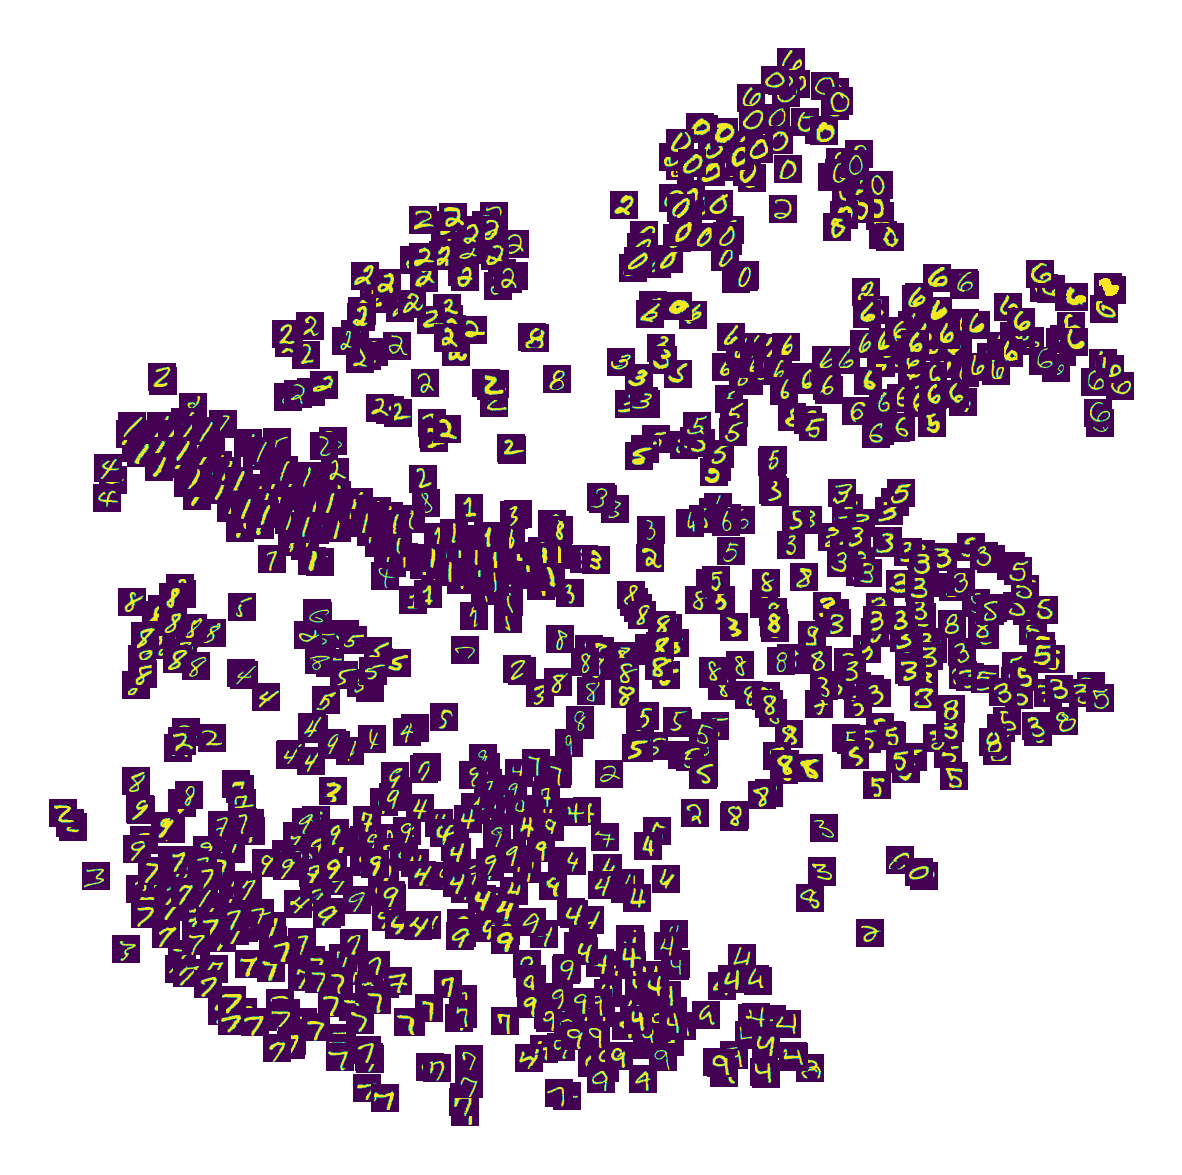

In [116]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(X_train_[:, 0], X_train_[:,1])

for idx in range(len(X_train_)):
    ab = AnnotationBbox(OffsetImage(X_train[idx].reshape(28, 28), zoom=0.7), (X_train_[idx, 0], X_train_[idx, 1]), frameon=False)
    ax.add_artist(ab)

plt.axis('off')
plt.show()

**Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS & compare the resulting visualization**

Let's try using `Kernel PCA` that should preserve clusters:

In [117]:
from sklearn.decomposition import KernelPCA

In [118]:
pca = KernelPCA(n_components=2)

In [119]:
X_train_ = pca.fit_transform(X_train[:1000])

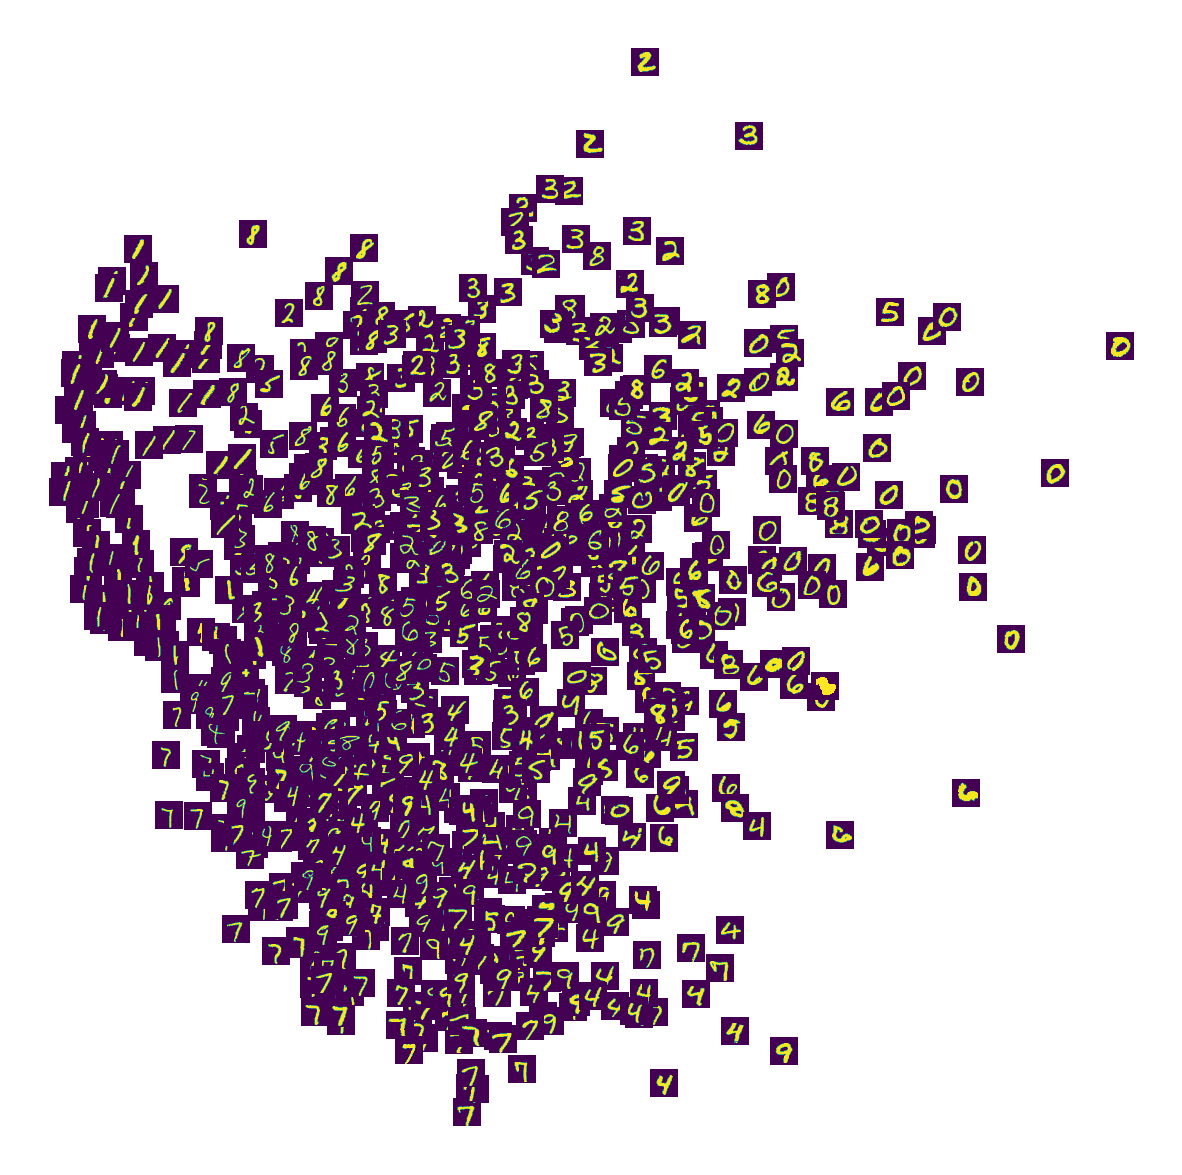

In [120]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(X_train_[:, 0], X_train_[:,1])

for idx in range(len(X_train_)):
    ab = AnnotationBbox(OffsetImage(X_train[idx].reshape(28, 28), zoom=0.7), (X_train_[idx, 0], X_train_[idx, 1]), frameon=False)
    ax.add_artist(ab)

plt.axis('off')
plt.show()

We notice clusters especially with `1`s and `0`s but its clustering isn't as good as `TSNE`.

In [121]:
from sklearn.manifold import LocallyLinearEmbedding

In [122]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

In [123]:
X_train_ = lle.fit_transform(X_train[:1000])

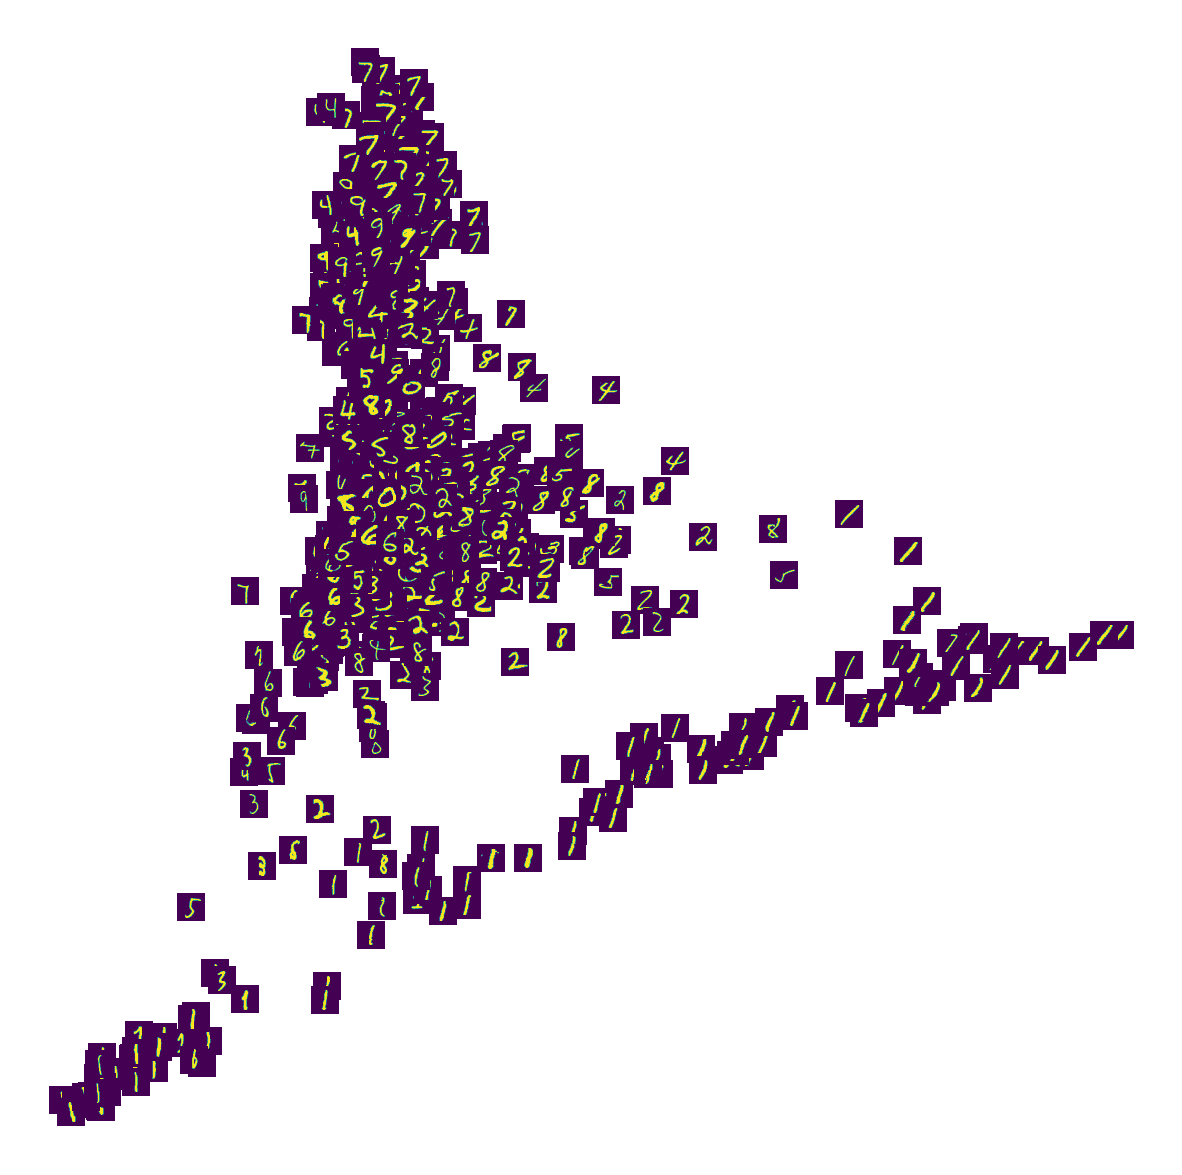

In [124]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(X_train_[:, 0], X_train_[:,1])

for idx in range(len(X_train_)):
    ab = AnnotationBbox(OffsetImage(X_train[idx].reshape(28, 28), zoom=0.7), (X_train_[idx, 0], X_train_[idx, 1]), frameon=False)
    ax.add_artist(ab)

plt.axis('off')
plt.show()

- It seems that `TSNE` produces the best interpretable visualizations.

---

# When PCA Fails: Scenarios and Solutions

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique, but it has limitations. Below are the main cases where PCA might fail or perform poorly:

---

## 1. When Data Is Not Linearly Separable
- **Why:** PCA relies on linear transformations and captures variability along the directions of maximum variance. Nonlinear structures in data cannot be captured effectively.
- **Example Dataset:** Clusters with nonlinear structures, such as concentric circles or spirals.
- **Solution:** Use **Kernel PCA**, **t-SNE**, or **UMAP** for nonlinear dimensionality reduction.

---

## 2. When Noise Dominates the Signal
- **Why:** PCA assumes the largest variance corresponds to the most important features. Noise with high variance can distort the principal components.
- **Example Dataset:** Noisy high-dimensional datasets, such as gene expression data.
- **Solution:** Preprocess the data using denoising techniques or feature selection.

---

## 3. When Variance Does Not Reflect Importance
- **Why:** PCA prioritizes high-variance features, but in some tasks, important features may have low variance.
- **Example Scenario:** Classification tasks where low-variance features are key predictors.
- **Solution:** Use supervised techniques like **Linear Discriminant Analysis (LDA)**.

---

## 4. Sparse or Sparse-Coding Data
- **Why:** PCA assumes dense data distributions, making it unsuitable for sparse datasets.
- **Example Dataset:** Term-document matrices in natural language processing (NLP).
- **Solution:** Use **Truncated SVD** or **Non-Negative Matrix Factorization (NMF)** for sparse data.

---

## 5. When the Dataset Is Too Large
- **Why:** Computing the covariance matrix or Singular Value Decomposition (SVD) on large datasets can be computationally expensive.
- **Example Dataset:** Image datasets with millions of features and samples.
- **Solution:** Use **Incremental PCA (IPCA)** or **Randomized SVD**.

---

## 6. When Features Are Not Scaled Properly
- **Why:** PCA is sensitive to the scale of features, as it uses the covariance matrix.
- **Example Dataset:** Mixed-scale features, such as income (in thousands) and age (in years).
- **Solution:** **Standardize** or **normalize** the dataset before applying PCA.

---

## 7. For Categorical or Mixed Data
- **Why:** PCA relies on numerical operations (mean, variance), making it unsuitable for categorical data.
- **Example Dataset:** Surveys with categorical responses.
- **Solution:** Use **Multiple Correspondence Analysis (MCA)** or other methods designed for categorical data.

---

## 8. Highly Correlated Features
- **Why:** PCA combines correlated features, but extreme multicollinearity can distort results.
- **Example Dataset:** Financial datasets with highly correlated market indices.
- **Solution:** Handle multicollinearity using preprocessing techniques before PCA.

---

## 9. Small Sample Size Relative to Feature Count
- **Why:** PCA can overfit when the number of features far exceeds the number of samples.
- **Example Dataset:** Microarray data or small clinical studies.
- **Solution:** Reduce feature count using **feature selection** or **regularization** before PCA.

---

By understanding these scenarios, you can recognize when PCA may not be suitable and take steps to address its limitations effectively.


# Dimensionality Reduction in Machine Learning

## What is Dimensionality Reduction?
Dimensionality reduction is the process of reducing the number of input variables (features) in a dataset while preserving as much relevant information as possible. Benefits include:
- **Reducing overfitting**
- **Enhancing model performance**
- **Improving visualization** for high-dimensional data

---

## Categories of Dimensionality Reduction

### 1. **Feature Selection**
   - Selects a subset of the original features based on importance.
   - **Methods:**
     - **Filter Methods:** Use statistical measures (e.g., correlation, chi-square).
     - **Wrapper Methods:** Use machine learning models (e.g., recursive feature elimination).
     - **Embedded Methods:** Use models like Lasso (L1 regularization) for built-in feature selection.

### 2. **Feature Extraction**
   - Creates new features by transforming or combining original ones into a lower-dimensional space.
   - **Examples:** PCA, t-SNE, LDA.

---

## Key Dimensionality Reduction Techniques

### **1. Linear Methods**
- Assume linear relationships between variables.

#### **Principal Component Analysis (PCA)**
   - Projects data onto directions of maximum variance.
   - **Key Algorithm:** SVD (Singular Value Decomposition)
   - **Use Case:** Data compression, noise reduction.

#### **Linear Discriminant Analysis (LDA)**
   - Projects data to maximize class separability.
   - **Use Case:** Classification tasks with labeled data.

#### **Factor Analysis**
   - Identifies latent variables that explain observed correlations.
   - **Use Case:** Psychometrics, social sciences.

---

### **2. Nonlinear Methods**
- Capture complex structures in data.

#### **Kernel PCA**
   - Extends PCA to capture nonlinear relationships using kernels.
   - **Key Parameters:** Kernel type (RBF, polynomial), gamma.
   - **Use Case:** Nonlinear data structures (e.g., spirals).

#### **t-SNE (t-Distributed Stochastic Neighbor Embedding)**
   - Preserves local similarity while reducing dimensions.
   - **Use Case:** Data visualization in 2D/3D.

#### **UMAP (Uniform Manifold Approximation and Projection)**
   - Similar to t-SNE but computationally faster and preserves global structure better.
   - **Use Case:** Visualization and clustering.

#### **Isomap**
   - Preserves geodesic distances by constructing a neighborhood graph.
   - **Use Case:** Nonlinear manifold learning.

---

### **3. Matrix Factorization Techniques**
- Decompose data into smaller matrices.

#### **Singular Value Decomposition (SVD)**
   - Used in PCA and Latent Semantic Analysis (LSA).
   - **Use Case:** Text data, collaborative filtering.

#### **Non-Negative Matrix Factorization (NMF)**
   - Factorizes data into non-negative components.
   - **Use Case:** Topic modeling, image processing.

---

### **4. Probabilistic Methods**
- Assume probabilistic models for the data.

#### **Latent Dirichlet Allocation (LDA)**
   - Used for topic modeling.
   - **Use Case:** Natural Language Processing (NLP).

#### **Gaussian Process Latent Variable Models (GPLVM)**
   - Nonlinear dimensionality reduction using Gaussian processes.
   - **Use Case:** Gene expression analysis.

---

### **5. Autoencoders (Deep Learning-Based)**
   - Neural networks that encode input into a compressed representation and then reconstruct it.
   - **Variants:**
     - **Denoising Autoencoder**
     - **Variational Autoencoder (VAE)**
   - **Use Case:** High-dimensional data like images and audio.

---

## Choosing the Right Technique
- **Linear Data:** Use PCA or LDA.
- **Nonlinear Data:** Use t-SNE, UMAP, or Kernel PCA.
- **Visualization:** Use t-SNE or UMAP.
- **Sparse Data:** Use NMF or Truncated SVD.
- **Deep Learning:** Use Autoencoders.

By understanding your data and the task at hand, you can select the most appropriate dimensionality reduction method to achieve better performance and insights.